# The Biological and Ecological Importance of Total Length in Possums: A Regression Analysis

In [1]:
# We use regression skills to predict the total length of a possum.

In [45]:
#import libraries  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm

In [46]:
# read the possum dataset from csv file
possum = pd.read_csv(r'C:\Users\USER\Desktop\possum.csv')
possum

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [47]:
# check for missing value in the possum dataset
possum.isna().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [48]:
# The results shows that there are missing values in two variable (age and footlgth)

In [49]:
# We drop the missing value and rename our dataset as cleaned_possum
cleaned_possum = possum.dropna()
cleaned_possum

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [50]:
# We recheck again if there is still presence of missing value in our cleaned data
cleaned_possum.isna().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [51]:
# We also check duplicate in the dataset
cleaned_possum.duplicated().sum()

0

In [52]:
# The result shows no duplicate entry and no missing value again in our dataset, Hence our possum data is cleaned for analysis

In [53]:
cleaned_possum.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,52.762376,3.673267,3.821782,92.730693,56.960396,87.269307,37.049505,68.398020,48.133663,15.050495,27.064356,32.638614
std,30.573894,2.366892,1.915182,3.518714,3.102679,4.196802,1.971681,4.413502,4.060352,1.058643,2.020722,2.727745
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,41.300000,12.800000,22.000000,25.000000
25%,26.000000,1.000000,2.000000,90.700000,55.000000,84.500000,36.000000,64.500000,44.800000,14.400000,25.500000,31.000000
50%,54.000000,4.000000,3.000000,92.900000,56.400000,88.000000,37.000000,67.900000,46.800000,14.900000,27.000000,32.500000
75%,79.000000,6.000000,5.000000,94.800000,58.100000,90.000000,38.000000,72.500000,52.000000,15.700000,28.000000,34.000000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [54]:
# The Count shows that 101 values are left for all the variable after cleaning the dataset.

In [55]:
# To see all the columns in the dataset
cleaned_possum.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [60]:
# We drop unneccesary column 
data_possum = cleaned_possum.drop(['site','Pop','case','eye','belly','chest','earconch'], axis = 1)
data_possum

,sex,age,hdlngth,skullw,totlngth,taill,footlgth
0,m,8.0,94.1,60.4,89.0,36.0,74.5
1,f,6.0,92.5,57.6,91.5,36.5,72.5
2,f,6.0,94.0,60.0,95.5,39.0,75.4
3,f,6.0,93.2,57.1,92.0,38.0,76.1
4,f,2.0,91.5,56.3,85.5,36.0,71.0
...,...,...,...,...,...,...,...
99,m,1.0,89.5,56.0,81.5,36.5,66.0
100,m,1.0,88.6,54.7,82.5,39.0,64.4
101,f,6.0,92.4,55.0,89.0,38.0,63.5
102,m,4.0,91.5,55.2,82.5,36.5,62.9


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hdlngth', ylabel='Density'>

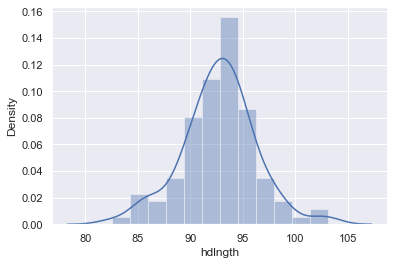

In [61]:
# We check the distribution plot to see if headlength follow regression assumption(Normality)
sns.distplot(data_possum['hdlngth'])

In [62]:
# The result shows that it has a bell shape, so we can check if there is relationship between headlength and total length

In [63]:
# we set headlength as our input variable
X1 = cleaned_possum[['hdlngth']]
X1

,hdlngth
0,94.1
1,92.5
2,94.0
3,93.2
4,91.5
...,...
99,89.5
100,88.6
101,92.4
102,91.5


In [64]:
# we set total length as  our Target variable
y = data_possum['totlngth']
y

0      89.0
1      91.5
2      95.5
3      92.0
4      85.5
       ... 
99     81.5
100    82.5
101    89.0
102    82.5
103    89.0
Name: totlngth, Length: 101, dtype: float64

In [65]:
# We make use of OLS method to see the model and build a summary table
a = sm.add_constant(X1)
results = sm.OLS(y,a).fit()
results.summary()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               totlngth   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     80.82
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           1.74e-14
Time:                        00:10:57   Log-Likelihood:                -257.54
No. Observations:                 101   AIC:                             519.1
Df Residuals:                      99   BIC:                             524.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.1224      8.254      1.590      0.115      -3.255      29.500
hdlngth        0.7996      0.089      8.990      0.000       0.623       0.976
==============================================================================
Omnibus:                        0.344   Durbin-Watson:                   1.650
Prob(Omnibus):                  0.842   Jarque-Bera (JB):                0.513
Skew:                          -0.079   Prob(JB):                        0.774
Kurtosis:                       2.689   Cond. No.                     2.46e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

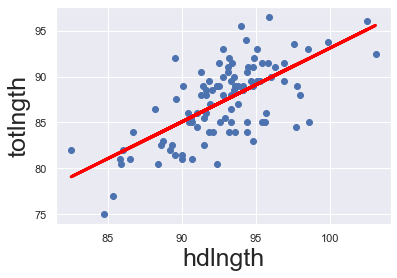

In [96]:
# Plot regression line
plt.scatter(X1,y)
yhat = 0.7996 * X1 + 13.1224
fig = plt.plot(X1, yhat, lw = 3, c='red', label ='Regression Line')
plt.xlabel('hdlngth', fontsize =25)
plt.ylabel('totlngth', fontsize =25)
plt.show()

In [97]:
# Renaming our data_possum to data
data = data_possum
data

,sex,age,hdlngth,skullw,totlngth,taill,footlgth
0,m,8.00,94.10,60.40,89.00,36.00,74.50
1,f,6.00,92.50,57.60,91.50,36.50,72.50
2,f,6.00,94.00,60.00,95.50,39.00,75.40
3,f,6.00,93.20,57.10,92.00,38.00,76.10
4,f,2.00,91.50,56.30,85.50,36.00,71.00
5,f,1.00,93.10,54.80,90.50,35.50,73.20
6,m,2.00,95.30,58.20,89.50,36.00,71.50
7,f,6.00,94.80,57.60,91.00,37.00,72.70
8,f,9.00,93.40,56.30,91.50,37.00,72.40
9,f,6.00,91.80,58.00,89.50,37.50,70.90


In [98]:
# To copy our data to data_dummy
data_dummy = data.copy()
data_dummy

,sex,age,hdlngth,skullw,totlngth,taill,footlgth
0,m,8.00,94.10,60.40,89.00,36.00,74.50
1,f,6.00,92.50,57.60,91.50,36.50,72.50
2,f,6.00,94.00,60.00,95.50,39.00,75.40
3,f,6.00,93.20,57.10,92.00,38.00,76.10
4,f,2.00,91.50,56.30,85.50,36.00,71.00
5,f,1.00,93.10,54.80,90.50,35.50,73.20
6,m,2.00,95.30,58.20,89.50,36.00,71.50
7,f,6.00,94.80,57.60,91.00,37.00,72.70
8,f,9.00,93.40,56.30,91.50,37.00,72.40
9,f,6.00,91.80,58.00,89.50,37.50,70.90


In [99]:
# we create a dummy data for all the categorical variable present in the dataset
#data_dummy[ 'Pop'] = data_dummy[ 'Pop'].map({'Vic': 1,'other': 0})
data_dummy[ 'sex'] = data_dummy[ 'sex'].map({'m': 1,'f': 0})
data_dummy['age'] = data_dummy['age'].apply(lambda x: 1 if x > 5 else 0) #possum over 5 months are adults while lesser are juvenile
data_dummy

,sex,age,hdlngth,skullw,totlngth,taill,footlgth
0,1,1,94.10,60.40,89.00,36.00,74.50
1,0,1,92.50,57.60,91.50,36.50,72.50
2,0,1,94.00,60.00,95.50,39.00,75.40
3,0,1,93.20,57.10,92.00,38.00,76.10
4,0,0,91.50,56.30,85.50,36.00,71.00
5,0,0,93.10,54.80,90.50,35.50,73.20
6,1,0,95.30,58.20,89.50,36.00,71.50
7,0,1,94.80,57.60,91.00,37.00,72.70
8,0,1,93.40,56.30,91.50,37.00,72.40
9,0,1,91.80,58.00,89.50,37.50,70.90


In [100]:
# To check again if there is no missing value in the dummy_dataset
data_dummy.isna().sum()

sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
dtype: int64

In [101]:
# We declare input and target variable
data_preprocessed  = data_dummy 
target = data_preprocessed['totlngth']
inputs = data_preprocessed.drop(['totlngth'], axis = 1)

In [102]:
#  Scaling 
# Declare a Standard Scaler object
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
inputs_scaled = scaler.fit_transform(inputs)
inputs_scaled

array([[ 8.43720574e-01,  1.89496942e+00,  3.91090727e-01,
         1.11412086e+00, -5.34944337e-01,  1.38946687e+00],
       [-1.18522652e+00,  1.89496942e+00, -6.58887487e-02,
         2.07173885e-01, -2.80088780e-01,  9.34051800e-01],
       [-1.18522652e+00,  1.89496942e+00,  3.62529510e-01,
         9.84557008e-01,  9.94189005e-01,  1.59440365e+00],
       [-1.18522652e+00,  1.89496942e+00,  1.34039772e-01,
         4.52190678e-02,  4.84477891e-01,  1.75379893e+00],
       [-1.18522652e+00, -5.27713002e-01, -3.51500921e-01,
        -2.13908640e-01, -5.34944337e-01,  5.92490497e-01],
       [-1.18522652e+00, -5.27713002e-01,  1.05478555e-01,
        -6.99773092e-01, -7.89799894e-01,  1.09344707e+00],
       [ 8.43720574e-01, -5.27713002e-01,  7.33825334e-01,
         4.01519666e-01, -5.34944337e-01,  7.06344265e-01],
       [-1.18522652e+00,  1.89496942e+00,  5.91019248e-01,
         2.07173885e-01, -2.52332235e-02,  9.79593307e-01],
       [-1.18522652e+00,  1.89496942e+00,  1.911

In [103]:
# Train Test split
# Training 80 percents our dataset and testing the remaining 20 percents
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled,target, test_size = 0.2, random_state = 365)

In [104]:
# We create the Regression for training dataset
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(x_train,y_train)

LinearRegression()

In [105]:
y_hat = regr.predict(x_train)
y_hat

array([88.01790428, 85.40626478, 84.15383243, 87.13319235, 81.44606934,
       96.45782361, 87.44662311, 92.62595346, 88.88615785, 86.02399063,
       92.69897259, 88.18638868, 90.19254415, 94.5329102 , 87.61641809,
       86.6253645 , 91.64433383, 83.46528912, 92.86693424, 86.55091729,
       84.65031216, 86.93553469, 88.62561393, 82.43161711, 84.90792874,
       88.01631336, 92.78834254, 83.88166557, 95.00522702, 87.07904956,
       88.39593049, 89.92145086, 88.55618479, 90.00251   , 88.59138731,
       83.51939519, 75.93131624, 84.96303799, 85.39083277, 89.42938143,
       89.00519314, 95.38753405, 81.62582393, 80.62452326, 92.71704162,
       88.07890839, 89.25776015, 82.65542462, 87.71384967, 87.2710435 ,
       89.14626812, 88.92303115, 87.10616378, 88.25510756, 84.64843439,
       85.39556721, 95.84026146, 84.55755668, 87.70648155, 86.20035793,
       88.51620094, 85.74777288, 87.76378154, 85.08951694, 81.2296228 ,
       89.57187552, 87.27474115, 91.38421181, 87.85766076, 92.12

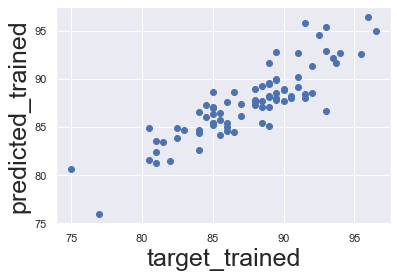

In [106]:
# Create a scatter plot to check relationship between the y_train and y_hat
plt.scatter(y_train,y_hat)
plt.xlabel('target_trained', fontsize =25)
plt.ylabel('predicted_trained', fontsize =25)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='totlngth', ylabel='Density'>

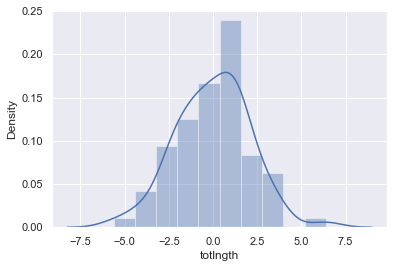

In [107]:
# Residual plot (Error check )
sns.distplot(y_train - y_hat)

In [108]:
# R-squared
regr.score(x_train, y_train)

0.7574804248530551

In [109]:
regr.intercept_

87.23238275906529

In [110]:
regr.coef_

array([-0.57667208, -0.04362805,  1.8684936 ,  0.01030159,  1.99562727,
        1.33040351])

In [111]:
# summary table
regr_summary = pd.DataFrame(data = inputs.columns.values, columns = ['Features'])
regr_summary

,Features
0,sex
1,age
2,hdlngth
3,skullw
4,taill
5,footlgth


In [112]:
regr_summary = pd.DataFrame([['intercept'],['sex'], ['age'],['hdlngth'],['skullw'],['taill'],['footlgth']], columns=['features'])
regr_summary['weights'] = regr.intercept_, regr.coef_[0], regr.coef_[1], regr.coef_[2], regr.coef_[3], regr.coef_[4], regr.coef_[5]
regr_summary

,features,weights
0,intercept,87.23
1,sex,-0.58
2,age,-0.04
3,hdlngth,1.87
4,skullw,0.01
5,taill,2.00
6,footlgth,1.33


In [113]:
#regr_summary = pd.DataFrame([['intercept'],['Pop'],['sex'],['age'],['hdlngth'],['skullw'],['taill'],['footlgth'], ['earconch'], ['chest'],['belly']], columns=['features'])
#regr_summary['weights'] = regr.intercept_, regr.coef_[0], regr.coef_[1], regr.coef_[2], regr.coef_[3], regr.coef_[4], regr.coef_[5],regr.coef_[6],regr.coef_[7],regr.coef_[8],regr.coef_[9]
#regr_summary

In [114]:
# Testing
y_hat_test = regr.predict(x_test)
y_hat_test

array([85.32976794, 79.9172484 , 84.44867176, 87.70439277, 88.28494785,
       88.33285273, 88.26081142, 89.35019314, 83.75612897, 86.67800463,
       80.79213227, 88.80427577, 83.32070868, 87.000614  , 86.72405626,
       86.7281427 , 84.12576388, 79.08536258, 87.53857541, 91.17208962,
       88.91591788])

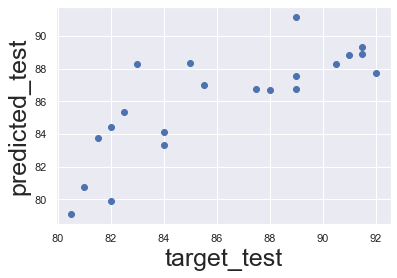

In [115]:
# Create a scatter plot to check relationship between the y_test and y_hat_test
plt.scatter(y_test, y_hat_test)
plt.xlabel('target_test', fontsize =25)
plt.ylabel('predicted_test', fontsize =25)
plt.show()

In [116]:
# We put the testing result into dataFrame and name it prediction
Data_pred = pd.DataFrame(y_hat_test, columns = ['Prediction'])
Data_pred

,Prediction
0,85.33
1,79.92
2,84.45
3,87.70
4,88.28
5,88.33
6,88.26
7,89.35
8,83.76
9,86.68


In [117]:
y_test

100   82.50
72    82.00
92    82.00
84    92.00
61    90.50
48    85.00
95    83.00
8     91.50
99    81.50
35    88.00
78    81.00
52    91.00
93    84.00
4     85.50
87    87.50
32    89.00
97    84.00
71    80.50
74    89.00
103   89.00
13    91.50
Name: totlngth, dtype: float64

In [118]:
Data_pred['Target'] = (y_test.reset_index(drop =  True))
Data_pred

,Prediction,Target
0,85.33,82.50
1,79.92,82.00
2,84.45,82.00
3,87.70,92.00
4,88.28,90.50
5,88.33,85.00
6,88.26,83.00
7,89.35,91.50
8,83.76,81.50
9,86.68,88.00


In [119]:
Data_pred['Residual']= Data_pred['Target'] - Data_pred['Prediction']
Data_pred

,Prediction,Target,Residual
0,85.33,82.50,-2.83
1,79.92,82.00,2.08
2,84.45,82.00,-2.45
3,87.70,92.00,4.30
4,88.28,90.50,2.22
5,88.33,85.00,-3.33
6,88.26,83.00,-5.26
7,89.35,91.50,2.15
8,83.76,81.50,-2.26
9,86.68,88.00,1.32


In [120]:
#difference percentage
Data_pred['difference%'] = np.absolute(Data_pred['Residual']/Data_pred['Target']*100)
Data_pred

,Prediction,Target,Residual,difference%
0,85.33,82.50,-2.83,3.43
1,79.92,82.00,2.08,2.54
2,84.45,82.00,-2.45,2.99
3,87.70,92.00,4.30,4.67
4,88.28,90.50,2.22,2.45
5,88.33,85.00,-3.33,3.92
6,88.26,83.00,-5.26,6.34
7,89.35,91.50,2.15,2.35
8,83.76,81.50,-2.26,2.77
9,86.68,88.00,1.32,1.50


In [121]:
Data_pred.describe()

,Prediction,Target,Residual,difference%
count,21.00,21.00,21.00,21.00
mean,86.01,86.19,0.18,2.40
std,3.23,3.95,2.45,1.44
min,79.09,80.50,-5.26,0.15
25%,84.13,82.50,-2.17,1.64
50%,86.73,85.50,0.78,2.44
75%,88.28,89.00,2.15,2.82
max,91.17,92.00,4.30,6.34


In [124]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
Data_pred.sort_values(by=['difference%'])

,Prediction,Target,Residual,difference%
16,84.13,84.00,-0.13,0.15
10,80.79,81.00,0.21,0.26
12,83.32,84.00,0.68,0.81
14,86.72,87.50,0.78,0.89
9,86.68,88.00,1.32,1.50
18,87.54,89.00,1.46,1.64
13,87.00,85.50,-1.50,1.76
17,79.09,80.50,1.41,1.76
7,89.35,91.50,2.15,2.35
11,88.80,91.00,2.20,2.41


In [ ]:
# The values show a low percentage difference across all cases, indicating that the predictions are closely aligned 
# with the targets. This is generally a good sign, suggesting that our predictive model performs well. Although some other rows 
# indicates a slightly larger discrepancy,which suggest that the model may not be capturing some specific feature or trend in 
# the data accurately at this value range and this could be investigated for further understanding.